In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

IMPORT DATA

In [3]:
train_data = pd.read_csv("C:/Users/hp/Desktop/MACHINE LEARNING/DATA FOR ZINDI COMPETITION/Train.csv")
train_data.head(20)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
5,tour_1005,UNITED KINGDOM,25-44,NaN,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,10.0,3.0,Cash,Yes,Friendly People,3480750.0
8,tour_101,NIGERIA,25-44,Alone,0.0,1.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,4.0,0.0,Cash,Yes,NaN,994500.0
9,tour_1011,INDIA,25-44,Alone,1.0,0.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,Yes,Friendly People,2486250.0


In [196]:
test_data = pd.read_csv("C:/Users/hp/Desktop/MACHINE LEARNING/DATA FOR ZINDI COMPETITION/Test.csv")
test_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [197]:
submission = pd.read_csv('C:/Users/hp/Desktop/MACHINE LEARNING/DATA FOR ZINDI COMPETITION/SampleSubmission.csv')
submission

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0
...,...,...
1596,tour_988,0
1597,tour_990,0
1598,tour_992,0
1599,tour_996,0


In [199]:
test_data.shape, train_data.shape

((1601, 22), (4809, 23))

In [200]:
submission.shape

(1601, 2)

# DATA EXPLORATION

In [201]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [202]:
train_data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [203]:
#Seperating categorical features from numerical features
cat_feat = [ col for col in train_data.columns if train_data[col].dtypes == 'O']
cat_feat

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

In [204]:
num_feat = [col for col in train_data.columns if col not in cat_feat ]
num_feat

['total_female',
 'total_male',
 'night_mainland',
 'night_zanzibar',
 'total_cost']

In [205]:
train_data[cat_feat].head()

,ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,Cash,No,Friendly People
1,tour_10,UNITED KINGDOM,25-44,NaN,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,Cash,Yes,"Wonderful Country, Landscape, Nature"
2,tour_1000,UNITED KINGDOM,25-44,Alone,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,Cash,No,Excellent Experience
3,tour_1002,UNITED KINGDOM,25-44,Spouse,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,Cash,Yes,Friendly People
4,tour_1004,CHINA,1-24,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,Cash,Yes,No comments


In [206]:
#Subtitute 1 for 'Yes' and 0 for 'No' in both Training and Testing Data 
train_data = train_data.replace(to_replace = 'Yes', value = 1)
train_data = train_data.replace(to_replace = 'No', value = 0)

In [207]:
test_data = test_data.replace(to_replace = 'Yes', value = 1)
test_data = test_data.replace(to_replace = 'No', value = 0)

In [208]:
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0


In [209]:
#Re-evualting the numerical and categorical features
cat_feat = [ col for col in train_data.columns if train_data[col].dtypes == 'O']
cat_feat

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'payment_mode',
 'most_impressing']

In [210]:
num_feat = [col for col in train_data.columns if col not in cat_feat]
num_feat

['total_female',
 'total_male',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'first_trip_tz',
 'total_cost']

In [211]:
#Correlation Matrix
train_data.corr()

,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost
total_female,1.000000,0.471180,0.180609,0.184939,0.160540,0.161170,0.142894,0.138061,0.110983,0.031200,0.138555,0.149683,0.286097
total_male,0.471180,1.000000,0.101589,0.050225,0.031883,0.038534,0.035097,0.027067,0.045927,-0.041964,0.050318,0.024567,0.185848
package_transport_int,0.180609,0.101589,1.000000,0.668654,0.610222,0.582701,0.420316,0.420610,0.475362,-0.113409,0.226218,0.266603,0.428362
package_accomodation,0.184939,0.050225,0.668654,1.000000,0.920942,0.853203,0.710369,0.728282,0.446550,-0.079729,0.141295,0.395990,0.463381
package_food,0.160540,0.031883,0.610222,0.920942,1.000000,0.823325,0.670995,0.697431,0.442818,-0.086681,0.131386,0.377631,0.435454
package_transport_tz,0.161170,0.038534,0.582701,0.853203,0.823325,1.000000,0.701938,0.705838,0.437938,-0.064737,0.106333,0.367461,0.434377
package_sightseeing,0.142894,0.035097,0.420316,0.710369,0.670995,0.701938,1.000000,0.789702,0.384506,0.008876,-0.005809,0.326457,0.394056
package_guided_tour,0.138061,0.027067,0.420610,0.728282,0.697431,0.705838,0.789702,1.000000,0.436110,-0.018583,0.007172,0.340611,0.373092
package_insurance,0.110983,0.045927,0.475362,0.446550,0.442818,0.437938,0.384506,0.436110,1.000000,-0.066656,0.118567,0.213590,0.272696
night_mainland,0.031200,-0.041964,-0.113409,-0.079729,-0.086681,-0.064737,0.008876,-0.018583,-0.066656,1.000000,-0.118155,-0.006287,0.020473


In [212]:
#Visualizing the Correlation Matrix
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

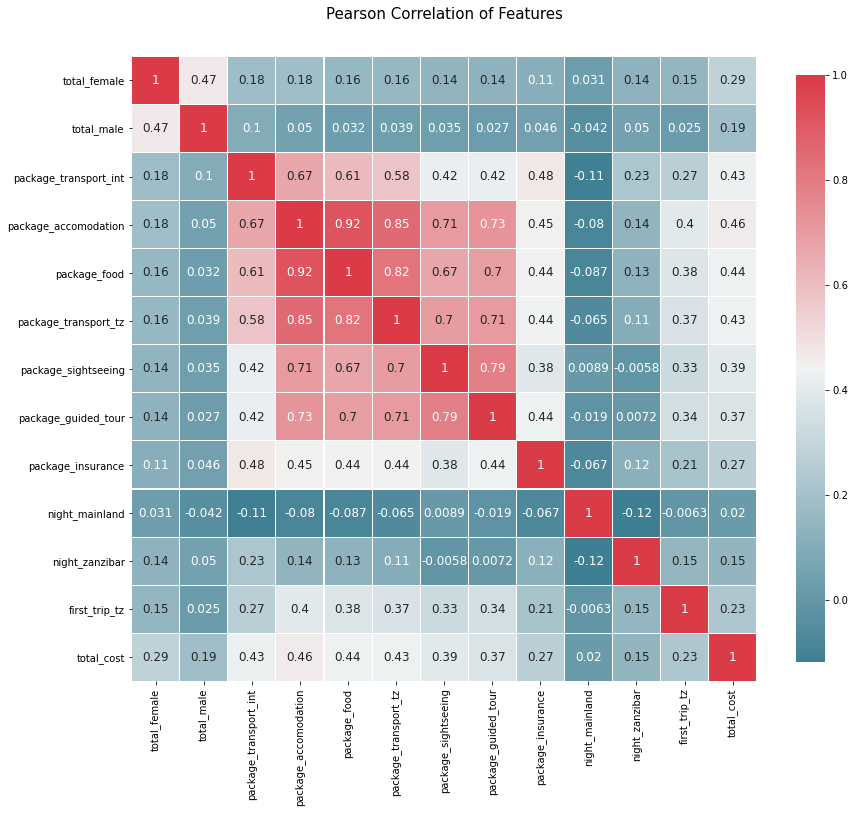

In [213]:
correlation_heatmap(train_data)

In [214]:
#From the Correlation Matrix, Package food and Package accomodation are highly Correlated so we drop one of the Columns
train_data.drop(columns  = ['package_food'], inplace = True)
test_data.drop(columns  = ['package_food'], inplace = True)

In [215]:
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0


### Feature Engineering

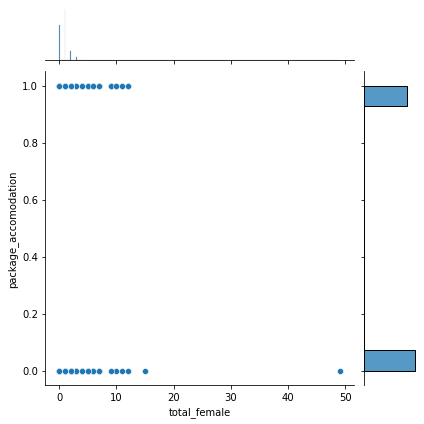

In [216]:
#Detecting Outliers
sns.jointplot(x = 'total_female',y = 'package_accomodation' , data = train_data)

In [217]:
#Checking for outlier
train_data.query('total_female > 40')

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
2983,tour_4627,KENYA,25-44,Children,49.0,44.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,0,0,0,0,4.0,0.0,Cash,1,Excellent Experience,26332020.0


In [218]:
#Removing the Outlier
train_data.drop([2983], inplace = True)

In [219]:
train_data.query('total_female > 40')

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost


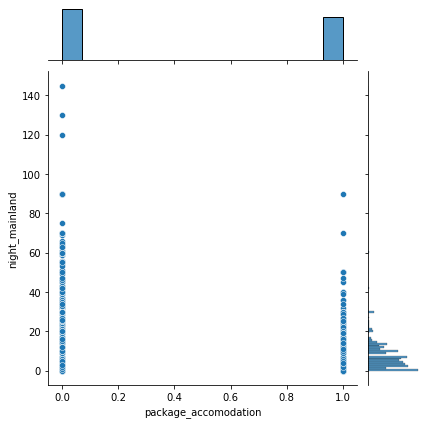

In [220]:
sns.jointplot(y = 'night_mainland',x = 'package_accomodation' , data = train_data)

In [221]:
uv = np.percentile(train_data.night_mainland,[99])[0]
uv

59.0

In [222]:
train_data[(train_data.night_mainland > uv)].head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
20,tour_1027,UNITED KINGDOM,1-24,NaN,1.0,0.0,Volunteering,Cultural tourism,Tanzania Mission Abroad,Independent,...,0,0,0,0,70.0,0.0,Cash,1,"Wonderful Country, Landscape, Nature",711262.5
52,tour_1061,IRELAND,25-44,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,60.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",712725.0
71,tour_1082,UNITED KINGDOM,45-64,Alone,1.0,0.0,Visiting Friends and Relatives,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,120.0,0.0,Cash,0,"Wonderful Country, Landscape, Nature",1422525.0
85,tour_1102,UGANDA,25-44,NaN,0.0,1.0,Visiting Friends and Relatives,Beach tourism,"Newspaper, magazines,brochures",Independent,...,0,0,0,0,60.0,2.0,Cash,0,Wildlife,4966000.0
89,tour_1108,NETHERLANDS,25-44,Spouse and Children,2.0,2.0,Other,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,90.0,0.0,Cash,0,NaN,100000.0


In [223]:
train_data.night_mainland[(train_data.night_mainland >2*uv)] = 2* uv
test_data.night_mainland[(test_data.night_mainland >2*uv)] = 2* uv

<ipython-input-223-89e0da8c1f43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.night_mainland[(train_data.night_mainland >2*uv)] = 2* uv
<ipython-input-223-89e0da8c1f43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.night_mainland[(test_data.night_mainland >2*uv)] = 2* uv


In [224]:
train_data[(train_data.night_mainland > uv)].head(5)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
20,tour_1027,UNITED KINGDOM,1-24,NaN,1.0,0.0,Volunteering,Cultural tourism,Tanzania Mission Abroad,Independent,...,0,0,0,0,70.0,0.0,Cash,1,"Wonderful Country, Landscape, Nature",711262.5
52,tour_1061,IRELAND,25-44,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,60.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",712725.0
71,tour_1082,UNITED KINGDOM,45-64,Alone,1.0,0.0,Visiting Friends and Relatives,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,118.0,0.0,Cash,0,"Wonderful Country, Landscape, Nature",1422525.0
85,tour_1102,UGANDA,25-44,NaN,0.0,1.0,Visiting Friends and Relatives,Beach tourism,"Newspaper, magazines,brochures",Independent,...,0,0,0,0,60.0,2.0,Cash,0,Wildlife,4966000.0
89,tour_1108,NETHERLANDS,25-44,Spouse and Children,2.0,2.0,Other,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,90.0,0.0,Cash,0,NaN,100000.0


In [225]:
train_data[(train_data.night_mainland > 50)].head(5)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
20,tour_1027,UNITED KINGDOM,1-24,NaN,1.0,0.0,Volunteering,Cultural tourism,Tanzania Mission Abroad,Independent,...,0,0,0,0,70.0,0.0,Cash,1,"Wonderful Country, Landscape, Nature",711262.5
30,tour_1038,UNITED KINGDOM,1-24,Alone,0.0,1.0,Volunteering,Hunting tourism,"Friends, relatives",Independent,...,0,0,0,0,56.0,0.0,Credit Card,0,Friendly People,1707030.0
52,tour_1061,IRELAND,25-44,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,60.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",712725.0
56,tour_1066,FRANCE,65+,Spouse,1.0,1.0,Visiting Friends and Relatives,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,56.0,0.0,Cash,1,NaN,2269330.0
71,tour_1082,UNITED KINGDOM,45-64,Alone,1.0,0.0,Visiting Friends and Relatives,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,118.0,0.0,Cash,0,"Wonderful Country, Landscape, Nature",1422525.0


In [226]:
a_uv = np.percentile(train_data.night_zanzibar,[99])[0]
a_uv

15.0

In [227]:
train_data[(train_data.night_zanzibar > a_uv)].head(20)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0
50,tour_1059,UNITED KINGDOM,25-44,NaN,0.0,1.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,1.0,30.0,Cash,0,Friendly People,2845050.0
147,tour_1178,UNITED STATES OF AMERICA,25-44,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,0,0,0,0,7.0,21.0,Cash,1,No comments,331500.0
286,tour_1357,AUSTRIA,1-24,Friends/Relatives,2.0,0.0,Volunteering,Cultural tourism,others,Independent,...,0,0,0,0,17.0,25.0,Cash,1,Friendly People,9945000.0
302,tour_1373,UAE,25-44,Alone,0.0,1.0,Leisure and Holidays,Beach tourism,"Radio, TV, Web",Package Tour,...,1,1,1,0,30.0,30.0,Cash,1,Excellent Experience,13260000.0
338,tour_1413,SPAIN,25-44,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,"Radio, TV, Web",Independent,...,0,0,0,0,0.0,35.0,Cash,1,NaN,248625.0
442,tour_1543,UNITED KINGDOM,1-24,Spouse,2.0,2.0,Visiting Friends and Relatives,Beach tourism,"Newspaper, magazines,brochures",Independent,...,0,0,0,0,0.0,60.0,Cash,0,Wildlife,200000.0
604,tour_1741,NIGER,25-44,Spouse and Children,2.0,1.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,4.0,16.0,Credit Card,0,Friendly People,4972500.0
664,tour_1813,ITALY,25-44,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,0,0,0,0,0.0,19.0,Cash,0,NaN,8033428.2
690,tour_185,UNITED KINGDOM,45-64,Spouse and Children,2.0,3.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Package Tour,...,1,1,0,0,3.0,19.0,Cash,1,Wildlife,19921492.5


In [228]:
train_data.night_zanzibar[(train_data.night_zanzibar>2*uv)] = 2* uv
test_data.night_zanzibar[(test_data.night_zanzibar>2*uv)] = 2* uv

<ipython-input-228-e2058351ea4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.night_zanzibar[(train_data.night_zanzibar>2*uv)] = 2* uv
<ipython-input-228-e2058351ea4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.night_zanzibar[(test_data.night_zanzibar>2*uv)] = 2* uv


In [229]:
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0


In [230]:
test_data.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

#### Checking for null cells and replacing or dropping them

In [231]:
train_data['travel_with'].unique()

array(['Friends/Relatives', nan, 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

In [232]:
#train_data.query('age_group = "1-24"')
train_data[(train_data.age_group == '1-24')].head(20)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0
20,tour_1027,UNITED KINGDOM,1-24,NaN,1.0,0.0,Volunteering,Cultural tourism,Tanzania Mission Abroad,Independent,...,0,0,0,0,70.0,0.0,Cash,1,"Wonderful Country, Landscape, Nature",711262.5
24,tour_1030,IRELAND,1-24,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,0,0,0,0,20.0,6.0,Cash,1,Friendly People,5673325.0
25,tour_1032,DENMARK,1-24,Friends/Relatives,2.0,2.0,Scientific and Academic,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,15.0,7.0,Cash,1,No comments,400000.0
27,tour_1034,GERMANY,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,24.0,4.0,Cash,1,Good service,453866.0
29,tour_1036,FRANCE,1-24,NaN,0.0,1.0,Leisure and Holidays,Conference tourism,others,Package Tour,...,1,1,1,1,11.0,3.0,Cash,1,"Wonderful Country, Landscape, Nature",6961500.0
30,tour_1038,UNITED KINGDOM,1-24,Alone,0.0,1.0,Volunteering,Hunting tourism,"Friends, relatives",Independent,...,0,0,0,0,56.0,0.0,Credit Card,0,Friendly People,1707030.0
33,tour_1040,EGYPT,1-24,Alone,0.0,1.0,Visiting Friends and Relatives,Bird watching,"Travel, agent, tour operator",Package Tour,...,0,0,0,0,2.0,0.0,Cash,1,No comments,2320500.0
36,tour_1043,MOZAMBIQUE,1-24,Alone,1.0,0.0,Visiting Friends and Relatives,Hunting tourism,"Friends, relatives",Independent,...,0,0,0,0,3.0,0.0,Cash,1,Excellent Experience,663000.0
43,tour_1050,CHINA,1-24,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,34.0,4.0,Cash,1,Friendly People,3273562.5


In [233]:
#Condtional Replacement. Checking conditions from two and returning a value if condition is True or False
def input_travel_with(cols):
    travel_with = cols[0]
    total_male = cols[1]
    total_female = cols[2]
    if pd.isnull(travel_with):
        if total_male  == 1 and total_female == 0:
            return 'Alone'
        elif total_male  == 0 and total_female == 1:
            return 'Alone'
        else:
            pass
    else:
        return travel_with

In [234]:
train_data['travel_with'] = train_data[['travel_with', 'total_male', 'total_female']].apply(input_travel_with, axis = 1)
test_data['travel_with'] = test_data[['travel_with', 'total_male', 'total_female']].apply(input_travel_with, axis = 1)


In [235]:
train_data.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with               29
total_female               3
total_male                 5
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          313
total_cost                 0
dtype: int64

In [236]:
test_data.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with                8
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [237]:
test_data['travel_with'].unique()

array(['Spouse', 'Friends/Relatives', 'Alone', 'Spouse and Children',
       'Children', None], dtype=object)

In [238]:
nan_df = test_data[test_data.travel_with.isna()]
nan_df

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
122,tour_1416,KENYA,25-44,None,0.0,2.0,Business,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,0,3,0,Credit Card,1,Wildlife
187,tour_1627,UNITED STATES OF AMERICA,45-64,None,0.0,3.0,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Independent,...,0,0,0,0,0,13,0,Cash,0,Good service
239,tour_1827,UNITED STATES OF AMERICA,45-64,None,11.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,1,0,12,0,Cash,1,Wildlife
330,tour_2142,ITALY,45-64,None,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,0,1,1,7,5,Cash,1,"Wonderful Country, Landscape, Nature"
549,tour_288,UNITED KINGDOM,24-Jan,None,2.0,1.0,Leisure and Holidays,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,0,50,5,Cash,1,No comments
634,tour_3252,ITALY,25-44,None,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,1,0,9,0,Cash,1,"Wonderful Country, Landscape, Nature"
1411,tour_6151,ZIMBABWE,25-44,None,0.0,2.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,0,7,0,Cash,1,Good service
1453,tour_6310,UGANDA,24-Jan,None,0.0,0.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,0,3,1,Cash,1,Wildlife


In [239]:
test_data['travel_with'].fillna(method='ffill',inplace = True)
test_data['total_male'].fillna(method='ffill',inplace = True)
test_data['total_female'].fillna(method='ffill',inplace = True)
test_data['most_impressing'].fillna(method='ffill',inplace = True)

In [240]:
test_data.head(60)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,1,1,10,3,Cash,1,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,1,0,0,0,0,13,0,Cash,0,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,0,7,14,Cash,0,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,0,0,0,4,Cash,1,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,1,1,0,0,0,10,0,Cash,1,Friendly People
5,tour_1010,DENMARK,25-44,Alone,1.0,0.0,Volunteering,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,0,55,0,Cash,0,Good service
6,tour_1014,GERMANY,45-64,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Travel, agent, tour operator",Package Tour,...,1,1,0,1,0,9,0,Cash,1,Friendly People
7,tour_1015,RUSSIA,24-Jan,Alone,1.0,0.0,Visiting Friends and Relatives,Beach tourism,"Friends, relatives",Independent,...,0,0,0,0,0,26,3,Cash,0,Friendly People
8,tour_1019,GERMANY,24-Jan,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,0,3,0,Cash,0,Friendly People
9,tour_1020,FRANCE,24-Jan,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Newspaper, magazines,brochures",Independent,...,0,0,0,0,0,30,9,Cash,1,Friendly People


In [241]:
test_data[(test_data.most_impressing.isna())]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing


In [242]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4808
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4808 non-null   object 
 1   country                4808 non-null   object 
 2   age_group              4808 non-null   object 
 3   travel_with            4779 non-null   object 
 4   total_female           4805 non-null   float64
 5   total_male             4803 non-null   float64
 6   purpose                4808 non-null   object 
 7   main_activity          4808 non-null   object 
 8   info_source            4808 non-null   object 
 9   tour_arrangement       4808 non-null   object 
 10  package_transport_int  4808 non-null   int64  
 11  package_accomodation   4808 non-null   int64  
 12  package_transport_tz   4808 non-null   int64  
 13  package_sightseeing    4808 non-null   int64  
 14  package_guided_tour    4808 non-null   int64  
 15  pack

In [243]:
train_data.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with               29
total_female               3
total_male                 5
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          313
total_cost                 0
dtype: int64

In [244]:
train_data.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with               29
total_female               3
total_male                 5
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          313
total_cost                 0
dtype: int64

In [245]:
train_data.dropna(inplace = True)

In [246]:
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0


In [247]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [248]:
target = train_data['total_cost']

In [249]:
cat_feat

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'payment_mode',
 'most_impressing']

In [250]:
label = LabelEncoder()
train_data['payment_mode'] = label.fit_transform(train_data['payment_mode'])

train_data['travel_with'] = label.fit_transform(train_data['travel_with'])
train_data['tour_arrangement'] = label.fit_transform(train_data['tour_arrangement'])
train_data['age_group'] = label.fit_transform(train_data['age_group'])
train_data['purpose'] = label.fit_transform(train_data['purpose'])

In [251]:
test_data['payment_mode'] = label.fit_transform(test_data['payment_mode'])

test_data['travel_with'] = label.fit_transform(test_data['travel_with'])
test_data['tour_arrangement'] = label.fit_transform(test_data['tour_arrangement'])
test_data['age_group'] = label.fit_transform(test_data['age_group'])
test_data['purpose'] = label.fit_transform(test_data['purpose'])

In [252]:
train_data['payment_mode'].unique()

array([0, 1, 2, 3])

In [253]:
train_data['travel_with'].unique()

array([2, 0, 3, 1, 4])

In [254]:
train_data['tour_arrangement'].unique()

array([0, 1])

In [255]:
train_data['age_group'].unique()

array([2, 1, 0, 3])

In [256]:
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,2,2,1.0,1.0,1,Wildlife tourism,"Friends, relatives",0,...,0,0,0,0,13.0,0.0,0,0,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,1,0,1.0,0.0,1,Cultural tourism,others,0,...,0,0,0,0,14.0,7.0,0,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,1,0,0.0,1.0,5,Cultural tourism,"Friends, relatives",0,...,0,0,0,0,1.0,31.0,0,0,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,1,3,1.0,1.0,1,Wildlife tourism,"Travel, agent, tour operator",1,...,1,1,1,0,11.0,0.0,0,1,Friendly People,7790250.0
4,tour_1004,CHINA,0,0,1.0,0.0,1,Wildlife tourism,"Travel, agent, tour operator",0,...,0,0,0,0,7.0,4.0,0,1,No comments,1657500.0


In [257]:
ind = train_data.drop(columns = ['total_cost','country', 'most_impressing', 'info_source','main_activity','ID'])
test = test_data.drop(columns = ['country', 'most_impressing', 'info_source','main_activity','ID'])

In [259]:
ind.shape, test.shape

((4464, 16), (1601, 16))

In [260]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 0 to 4808
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              4464 non-null   int32  
 1   travel_with            4464 non-null   int32  
 2   total_female           4464 non-null   float64
 3   total_male             4464 non-null   float64
 4   purpose                4464 non-null   int32  
 5   tour_arrangement       4464 non-null   int32  
 6   package_transport_int  4464 non-null   int64  
 7   package_accomodation   4464 non-null   int64  
 8   package_transport_tz   4464 non-null   int64  
 9   package_sightseeing    4464 non-null   int64  
 10  package_guided_tour    4464 non-null   int64  
 11  package_insurance      4464 non-null   int64  
 12  night_mainland         4464 non-null   float64
 13  night_zanzibar         4464 non-null   float64
 14  payment_mode           4464 non-null   int32  
 15  firs

In [261]:
test.shape, ind.shape

((1601, 16), (4464, 16))

In [262]:
scaler = StandardScaler()
x = scaler.fit_transform(ind)

In [310]:
x_sub = scaler.fit_transform(test)

In [264]:
X_train,X_test, y_train, y_test = train_test_split(ind,target, test_size = 0.25, random_state = 2)

### Modelling the Data

In [265]:
#Starting with a simple Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [266]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
y_predict=model.predict(X_train)

In [267]:
df = pd.DataFrame(prediction, y_test)
df.head()

,0
total_cost,
2817750.0,8.989200e+06
134000.0,1.312148e+07
50553750.0,1.216965e+07
414375.0,1.789628e+06
3403995.0,4.896095e+06


In [268]:
mse = mean_squared_error(y_test,prediction)
print(mse)

96567994829663.22


In [269]:
score = r2_score(y_test,prediction)
score

0.3431294023728917

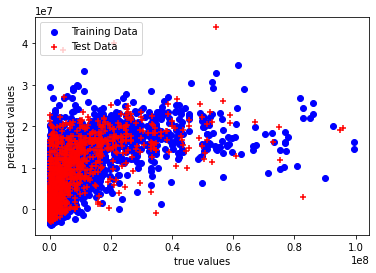

In [270]:
plt.scatter(y_train, y_predict, c='b', marker='o', label = "Training Data")
plt.scatter(y_test, prediction, c='r', marker='+', label = 'Test Data')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend(loc = 'upper left')
plt.plot()
plt.show()

In [271]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
cv = KFold(shuffle = True, random_state = 2, n_splits  =10)
scores = cross_val_score(model, x, target, cv  =cv, scoring = 'neg_mean_absolute_error')

In [272]:
print('%.8f'%scores.mean())

-5838974.12025137


In [273]:
X_train.shape

(3348, 16)

In [274]:
y_train.shape

(3348,)

In [275]:
X_test.shape

(1116, 16)

In [276]:
test.shape

(1601, 16)

### Advance Regression Models

In [277]:
from sklearn.linear_model import Ridge
alpha_ridge = [-3,-2,-1,1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.5,1,1.5,2,3,4,5,10,20,30,40]
temp_rss = {}
temp_mse = {}

for i in alpha_ridge:
    ridge = Ridge(alpha = i, normalize = True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred- y_test)**2)
    temp_mse[i] = mse    
    temp_rss[i] = rss
    

In [278]:
for key, value in sorted(temp_mse.items(), key = lambda item: item[1]):
    print('%s: %s' % (key, value))

0.01: 96552176785848.34
0.001: 96566257912853.88
0.0001: 96567819525501.0
1e-05: 96567977283058.2
1e-08: 96567994812114.78
1e-10: 96567994829487.72
1e-15: 96567994829663.22
0.5: 97324250036078.34
1: 98916241284572.36
1.5: 100637641543681.7
2: 102349709773972.77
3: 105586627331327.8
4: 108504908617049.86
5: 111104763612420.67
10: 120433872073885.38
20: 129711376410233.92
30: 134226699423753.47
40: 136882498114781.7
-3: 196697490634295.8
-2: 336657063416176.44
-1: 665648880933797.9


In [279]:
for key, value in sorted(temp_rss.items(), key = lambda item: item[1]):
    print('%s: %s' % (key, value))

0.01: 1.0775222929300677e+17
0.001: 1.077679438307449e+17
0.0001: 1.077696865904591e+17
1e-05: 1.0776986264789293e+17
1e-08: 1.0776988221032014e+17
1e-10: 1.0776988222970818e+17
1e-15: 1.0776988222990411e+17
0.5: 1.086138630402635e+17
1: 1.1039052527358285e+17
1.5: 1.1231160796274883e+17
2: 1.1422227610775365e+17
3: 1.1783467610176189e+17
4: 1.2109147801662749e+17
5: 1.2399291619146117e+17
10: 1.3440420123445608e+17
20: 1.4475789607382106e+17
30: 1.497969965569088e+17
40: 1.5276086789609635e+17
-3: 2.1951439954787366e+17
-2: 3.757092827724534e+17
-1: 7.428641511221175e+17


In [280]:
from sklearn.linear_model import Lasso
temp_rss = {}
temp_mse = {}

for i in alpha_ridge:
    lasso_reg = Lasso(alpha = i, normalize = True)
    
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test) **2)
    temp_rss[i] = rss
    temp_mse[i] = mse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.800546000493524e+17, tolerance: 52080991511742.14
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.800602764239214e+17, tolerance: 52080991511742.14
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.800659527950906e+17, tolerance: 52080991511742.14
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conve

In [281]:
for key, value in sorted(temp_rss.items(), key = lambda item: item[1]):
    print('%s: %s' % (key, value))

40: 1.0775870388515792e+17
30: 1.0776150312291898e+17
20: 1.0776432692344544e+17
10: 1.0776716398761304e+17
5: 1.0776858749356197e+17
4: 1.077688617262157e+17
3: 1.0776911941564245e+17
2: 1.0776937204933786e+17
1.5: 1.0776950091176902e+17
1: 1.0776962721508146e+17
0.5: 1.0776975477030117e+17
0.01: 1.077698796911984e+17
0.001: 1.0776988197528144e+17
0.0001: 1.077698822046399e+17
1e-05: 1.0776988222736997e+17
1e-08: 1.0776988222990163e+17
1e-10: 1.0776988222990405e+17
1e-15: 1.0776988222990406e+17
-1: 1.077701678227231e+17
-2: 1.0777045354814907e+17
-3: 1.0777073940618178e+17


In [282]:
for key, value in sorted(temp_mse.items(), key = lambda item: item[1]):
    print('%s: %s' % (key, value))

40: 96557978391718.62
30: 96560486669282.17
20: 96563016956492.5
10: 96565559128685.5
5: 96566834671650.5
4: 96567080399834.92
3: 96567311304339.16
2: 96567537678618.3
1.5: 96567653146746.5
1: 96567766321757.66
0.5: 96567880618549.33
0.01: 96567992554837.22
0.001: 96567994601506.55
0.0001: 96567994807025.03
1e-05: 96567994827392.39
1e-08: 96567994829660.92
1e-10: 96567994829663.17
1e-15: 96567994829663.2
-1: 96568250737207.14
-2: 96568506763574.42
-3: 96568762908765.02


In [283]:
from sklearn.linear_model import ElasticNet
temp_rss = {}
temp_mse = {}

for i in alpha_ridge:
    lasso_reg = ElasticNet(alpha = i, normalize = True)
    
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test) **2)
    temp_rss[i] = rss
    temp_mse[i] = mse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0419555807400315e+18, tolerance: 52080991511742.14
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0421237200750438e+18, tolerance: 52080991511742.14
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.042629197864133e+18, tolerance: 52080991511742.14
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Con

In [284]:
for key, value in sorted(temp_mse.items(), key = lambda item: item[1]):
    print('%s: %s' % (key, value))

1e-05: 96543345902763.92
1e-08: 96567965458675.48
1e-10: 96567994535903.4
1e-15: 96567994829660.27
0.0001: 96583691873881.75
0.001: 101237838140962.27
0.01: 127474232531611.42
0.5: 146466492970371.5
1: 146754261106377.4
1.5: 146850790566179.56
2: 146899169800437.5
3: 146947625591422.44
4: 146971882247522.12
5: 146986445456541.6
10: 147015592630113.16
20: 147030176603664.2
30: 147035039468084.28
40: 147037471189106.0
-3: 147142217647928.6
-2: 147191058660772.6
-1: 147338047908121.06


In [285]:
for key, value in sorted(temp_rss.items(), key = lambda item: item[1]):
    print('%s: %s' % (key, value))

1e-05: 1.0774237402748467e+17
1e-08: 1.0776984945188176e+17
1e-10: 1.0776988190206842e+17
1e-15: 1.077698822299009e+17
0.0001: 1.0778740013125205e+17
0.001: 1.12981427365314e+17
0.01: 1.4226124350527814e+17
0.5: 1.634566061549347e+17
1: 1.637777553947173e+17
1.5: 1.638854822718563e+17
2: 1.6393947349728822e+17
3: 1.6399355016002742e+17
4: 1.6402062058823446e+17
5: 1.6403687312950032e+17
10: 1.6406940137520592e+17
20: 1.6408567708968902e+17
30: 1.6409110404638218e+17
40: 1.6409381784704214e+17
-3: 1.6421071489508858e+17
-2: 1.642652214654221e+17
-1: 1.6442926146546294e+17


In [286]:
Kfolds = KFold(n_splits =10, shuffle = True, random_state = 42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(target,y_pred))


def cv_rmse(models, x=x):
    rsme = np.sqrt(-cross_val_score(models, x, target, scoring = 'neg_mean_squared_error', cv = Kfolds))
    return(rsme)

In [287]:
alpha_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15,15.1, 15.2, 15.3, 15.4, 15.5]
alpha2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99,1]

In [288]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alpha_alt,cv = Kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter = 1e7, alphas = alpha2, random_state = 42, cv = Kfolds))
elasticnet=make_pipeline(RobustScaler(), ElasticNetCV(max_iter = 1e7, alphas = e_alphas,  cv = Kfolds, l1_ratio=e_l1ratio))
svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon =0.008, gamma = 0.0003))

In [289]:
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor



gbr = GradientBoostingRegressor(n_estimators = 3000, learning_rate= 0.05, max_depth =4, 
                                max_features = 'sqrt', min_samples_leaf =15,
                               min_samples_split = 10, loss= 'huber', random_state=41)
lightgbm = LGBMRegressor(objective = 'regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin= 200,
                          bagging_fraction = 0.75, bagging_freq = 5, bagging_speed = 7, feature_fraction = 0.2,
                          feature_fraction_seed = 7, verbose = 1)
xgboost = XGBRegressor(learning_rate=0.01, n_estimators = 3460, max_depth =3, min_child_weight= 0, gamma = 0, subsample =0.7,
                      colsample_bytree = 0.7, objective  ='reg:linear', nthread = -1,scale_pos_weight =1, seed =27, reg_alpha =0.00006)

In [290]:
from sklearn.ensemble import StackingRegressor
from mlxtend.regressor import StackingCVRegressor

In [291]:
stack_gen = StackingCVRegressor(regressors = (ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor = xgboost, use_features_in_secondary =True)

In [292]:
from datetime import datetime
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(),)

score = cv_rmse(lasso)
print("Lasso: {:.4f}({:.4f})\n".format(score.mean(), score.std()), datetime.now(),)

score = cv_rmse(elasticnet)
print("ElasticNet: {:.4f}({:.4f})\n".format(score.mean(), score.std()), datetime.now(),)

score = cv_rmse(svr)
print("SupportVectorRegression: {:.4f}({:.4f})\n".format(score.mean(), score.std()), datetime.now(),)

# score = cv_rmse(gbr)
# print("GradientBooster: {:.4f}({:.4f})\n".format(score.mean(), score.std()), datetime.now(),)

score = cv_rmse(lightgbm)
print("LightGBooster: {:.4f}({:.4f})\n".format(score.mean(), score.std()), datetime.now(),)

score = cv_rmse(xgboost)
print("XGBoost: {:.4f}({:.4f})\n".format(score.mean(), score.std()), datetime.now(),)

Ridge: 9989264.3156 (1273523.3779)
 2021-12-20 19:48:11.904391
Lasso: 9991066.1586(1271181.1760)
 2021-12-20 19:48:13.750087
ElasticNet: 9990973.8420(1271288.3628)
 2021-12-20 19:48:22.942901
SupportVectorRegression: 13185212.7702(1397364.7913)
 2021-12-20 19:48:41.614520
[LightGBM] [Warning] Unknown parameter: bagging_speed
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: bagging_speed
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagg

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: bagging_speed
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: bagging_speed
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can 

In [293]:
print('START FIT')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(x), np.array(target))

print('elsaticnet')
elastic_model_full_data = elasticnet.fit(x,target)

print('lasso')
lasso_model_full_data = lasso.fit(x,target)

print('Ridge')
ridge_model_full_data = ridge.fit(x,target)

print('Svr')
svr_model_full_data = svr.fit(x,target)

print('xgboost')
xgboost_model_full_data = xgboost.fit(x,target)

print('lightgbm')
lightgbm_full_data = lightgbm.fit(x,target)

START FIT
stack_gen
[19:51:31] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:41] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:53] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:05] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:52:16] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] Unknown parameter: bagging_speed
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] baggin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: bagging_speed
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: bagging_speed
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Cur

In [294]:
1.0 * elastic_model_full_data.predict(x)

array([ 5854458.53451786,  2503065.92456525,  1975838.20578014, ...,
        -783721.90354961, 10547896.03441181, 16664102.64630656])

In [295]:
def blend_models_predict(X):
    return ((np.array(0.1).dot(elastic_model_full_data.predict(X)))+ \
            (np.array(0.05).dot(lasso_model_full_data.predict(x))) + \
            (np.array(0.2).dot(ridge_model_full_data.predict(x)))+ \
            (np.array(0.1).dot(svr_model_full_data.predict(x)))  +\
            (np.array(0.1).dot(lightgbm_full_data.predict(x)))+ \
            (np.array(0.3).dot(stack_gen_model.predict(np.array(X)))))

In [296]:
print('RMSLE Score on train data:')
print(rmsle(target, blend_models_predict(x)))

RMSLE Score on train data:
9781467.987050775


In [297]:
print(mean_absolute_error(target, blend_models_predict(x)))

4981110.69297387


In [298]:
predi = blend_models_predict(x)

In [299]:
score = r2_score(target,predi)
score

0.37640399107648126

In [300]:
x.shape, test.shape

((4464, 16), (1601, 16))

In [318]:
blend_weights = [0.1, 0.05, 0.2, 0.1, 0.1, 0.3]

In [321]:
print('\nGenerating submission')
submission = pd.read_csv('C:/Users/hp/Desktop/MACHINE LEARNING/DATA FOR ZINDI COMPETITION/SampleSubmission.csv')
submission.iloc[:, 1] = np.round_(np.expm1((blend_weights[0] * elastic_model_full_data.predict(x_sub)) +
                                           (blend_weights[1] * lasso_model_full_data.predict(x_sub)) +
                                           (blend_weights[2] * ridge_model_full_data.predict(x_sub)) +
                                           (blend_weights[3] * svr_model_full_data.predict(x_sub)) +
                                           (blend_weights[4] * lightgbm_full_data.predict(x_sub)) +
                                           (blend_weights[5] * stack_gen_model.predict(np.array(x_sub)))))
submission.to_csv('submission_new4.csv', index = False)
print('Submission saved')


Generating submission


<ipython-input-321-d8ef05356198>:3: RuntimeWarning: overflow encountered in expm1
  submission.iloc[:, 1] = np.round_(np.expm1((blend_weights[0] * elastic_model_full_data.predict(x_sub)) +


Submission saved


In [322]:
sg = pd.read_csv('submission_new4.csv')
sg

,ID,total_cost
0,tour_1,inf
1,tour_100,inf
2,tour_1001,inf
3,tour_1006,inf
4,tour_1009,inf
...,...,...
1596,tour_988,inf
1597,tour_990,inf
1598,tour_992,inf
1599,tour_996,inf


In [166]:
x_sub = ind.iloc[:len(target):, :]

In [309]:
x_sub.shape

(4464, 16)

In [307]:
x

array([[ 0.90639314,  0.42515111,  0.06041352, ..., -0.55819793,
        -0.38218994, -1.49100795],
       [-0.37931991, -0.9516168 ,  0.06041352, ...,  1.08330112,
        -0.38218994,  0.67068724],
       [-0.37931991, -0.9516168 , -0.87275591, ...,  6.71129786,
        -0.38218994, -1.49100795],
       ...,
       [-1.66503297, -0.9516168 ,  0.06041352, ...,  1.08330112,
        -0.38218994,  0.67068724],
       [-0.37931991,  0.42515111,  0.06041352, ..., -0.55819793,
         2.36072947, -1.49100795],
       [-0.37931991,  1.11353507,  0.06041352, ...,  1.08330112,
        -0.38218994,  0.67068724]])

In [305]:
test.head()

,age_group,travel_with,total_female,total_male,purpose,tour_arrangement,package_transport_int,package_accomodation,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz
0,2,3,1.0,1.0,1,1,1,1,1,1,1,1,10,3,0,1
1,1,2,0.0,4.0,0,1,1,1,0,0,0,0,13,0,0,0
2,1,2,3.0,0.0,1,0,0,0,0,0,0,0,7,14,0,0
3,0,2,2.0,0.0,1,0,0,0,0,0,0,0,0,4,0,1
4,2,2,2.0,2.0,1,1,1,1,1,0,0,0,10,0,0,1


In [303]:
test.shape, x.shape

((1601, 16), (4464, 16))

In [289]:
df = pd.DataFrame(predi, target)
df.head()

,0
total_cost,
674602.5,4.445841e+06
3214906.5,4.403138e+06
3315000.0,3.337889e+06
7790250.0,8.112005e+06
1657500.0,2.934607e+06
